In [12]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

dataframe = pd.read_csv("results.csv", header=None)

In [33]:
#make fitness calculations
population_size = 100
num_generations = int((len(dataframe.index)/population_size))
mean_fitness_values = []
max_fitness_values = []
min_fitness_values = []
sd_fitness_values = []
for i in range(1,num_generations):
    generation = dataframe[(i-1)*population_size:i*population_size]
    mean_fitness_values.append(generation[generation.columns[10]].mean())
    max_fitness_values.append(generation[generation.columns[10]].max())
    min_fitness_values.append(generation[generation.columns[10]].min())
    sd_fitness_values.append(generation[generation.columns[10]].std())
x = range(1,num_generations)

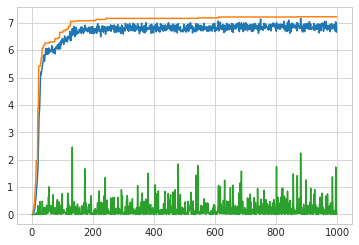

In [67]:
#make diversity calculations
mean_diversity_values = []
max_diversity_values = []
min_diversity_values = []
sd_diversity_values = []

changing_values = []
non_changing_point = None

for i in range(1,num_generations):
    generation = dataframe[(i-1)*population_size:i*population_size]
    distances = []
    mean_vector = []
    for j in range(0,10):
       mean_vector.append(generation[generation.columns[j]].mean())
    mean_vector = np.array(mean_vector)
    for j in range(0,population_size):
        distances.append(scipy.spatial.distance.euclidean(mean_vector, generation.iloc[j,0:10].values))
    mean_diversity_values.append(sum(distances)/len(distances)) 
    #determine changing_point
    if i is not 1:
        changing_values.append(abs(mean_diversity_values[i-1] - mean_diversity_values[i-2]))
        if len(changing_values) >= 5:
            if np.mean(changing_values[-5:]) < 0.05and non_changing_point is None:
                non_changing_point = i                
    max_diversity_values.append(max(distances))
    min_diversity_values.append(min(distances))
    sd_diversity_values.append(np.std(distances))

Text(61,2,'Non changing point = 31')

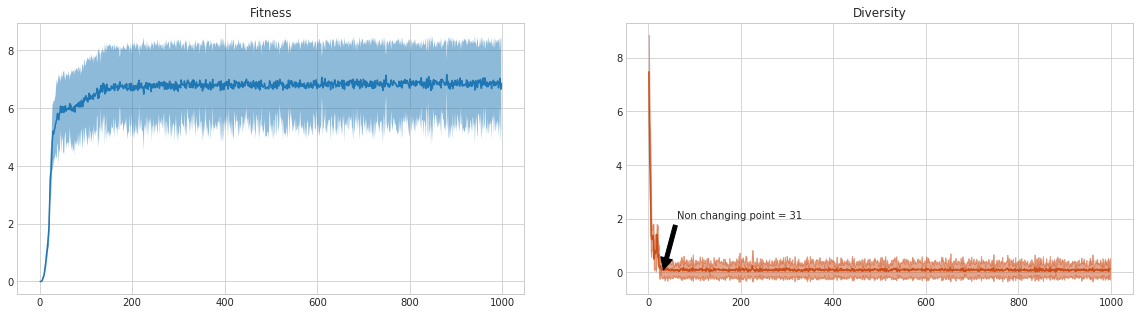

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

f, axarr = plt.subplots(1,2, figsize=(20, 5))
#fitness plot
axarr[0].plot(x, mean_fitness_values)
#axarr[0].plot(x, max_fitness_values)
#axarr[0].plot(x, min_fitness_values)
axarr[0].fill_between(x, [y - sd_fitness_values[i] for i, y in enumerate(mean_fitness_values)], [y + sd_fitness_values[i] for i, y in enumerate(mean_fitness_values)], alpha=0.5)
axarr[0].set_title('Fitness')

#diversity plot
axarr[1].plot(x, mean_diversity_values, color='#CC4F1B')
#axarr[1].plot(x, max_diversity_values)
#axarr[1].plot(x, min_diversity_values)
axarr[1].fill_between(x, [y - sd_diversity_values[i] for i, y in enumerate(mean_diversity_values)], [y + sd_diversity_values[i] for i, y in enumerate(mean_diversity_values)], alpha=0.5, color='#CC4F1B')
axarr[1].set_title('Diversity')
axarr[1].annotate('Non changing point = {}'.format(non_changing_point), 
            xy=(non_changing_point, 0), 
            xytext=(non_changing_point+30, 2), 
            arrowprops = dict(facecolor='black', shrink=0.05))

In [73]:
print(non_changing_point)

31
